<class 'tuple'> 2
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[5 0 4 1 9]


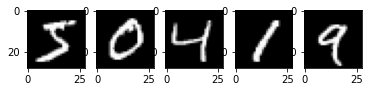

In [1]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist.load_data()
print(type(mnist), len(mnist))

(X_train, y_train), (X_test, y_test) = mnist
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(y_train[:5])
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap='gray')

In [2]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [3]:
(X_train, X_test) = (np.float32(X_train)/255, np.float32(X_test)/255)

n_input = 28*28
(X_train, X_test) = (X_train.reshape(-1, n_input), X_test.reshape(-1, n_input))

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(28*28,)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')])
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train,
          batch_size=100,
          epochs=50,
          validation_split=0.2,
          verbose=0)
test_scores = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
313/313 - 1s - loss: 0.1599 - accuracy: 0.9811 - 503ms/epoch - 2ms/step
Test loss: 0.15990586578845978
Test accuracy: 0.9811000227928162


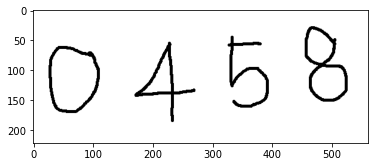

(1, 784)
[[1.0000000e+00 2.2652790e-18 2.3829809e-09 2.5172969e-18 5.9963269e-19
  1.4979149e-18 2.0965046e-17 9.5699027e-19 1.5640631e-18 1.1923461e-14]] [0]
(1, 784)
[[4.63574623e-10 1.70520650e-07 1.04270446e-04 7.75353293e-09
  9.99891520e-01 2.47010257e-06 1.07971466e-07 1.39588496e-06
  1.82653856e-08 3.09465022e-08]] [4]
(1, 784)
[[2.9225307e-12 5.9621980e-13 6.7674683e-17 2.3882561e-07 6.0342674e-15
  9.9999964e-01 7.8927039e-11 8.7543938e-14 8.9986813e-08 2.0293575e-08]] [5]
(1, 784)
[[1.2933026e-06 6.5992559e-08 3.2298817e-07 3.4667543e-04 4.6002990e-07
  1.3340372e-02 8.5052689e-06 7.4866096e-09 9.8619348e-01 1.0890254e-04]] [8]


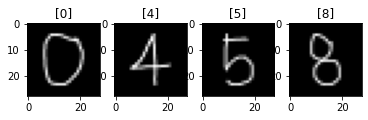

In [5]:
import numpy as np
import cv2
import img2data

img_path='./0458.png'

image = cv2.imread(img_path)
plt.imshow(image)
plt.show()

numbers = img2data.img2digits(image, (28, 28), border=4)
for i, n in enumerate(numbers):
    print(n.shape)
    Z= model.predict(n.astype(np.float32)/255.0)
    
    pred = np.argmax(Z, axis=1)
    print(Z, pred)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred))
    plt.imshow(n.reshape(28,28), cmap='gray')


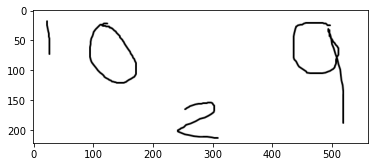

(1, 784)
[[2.5699245e-13 1.9999008e-07 9.7679150e-01 2.3150779e-02 1.2115171e-14
  1.5957294e-10 2.2054225e-12 2.1951257e-05 3.5608766e-05 3.7910981e-12]] [2]
(1, 784)
[[9.9605101e-01 7.2181010e-08 3.8741145e-03 4.2343385e-05 7.9616609e-07
  3.7356522e-06 2.2989764e-06 1.1931525e-07 2.3869181e-05 1.5780906e-06]] [0]
(1, 784)
[[2.3886759e-03 9.9994875e-03 1.1461478e-03 4.8527095e-02 5.1388788e-01
  2.5243585e-03 4.4950281e-04 3.4278275e-03 3.7498865e-01 4.2660452e-02]] [4]
(1, 784)
[[2.1907619e-13 1.0000000e+00 3.2930398e-14 5.8486976e-17 3.1282879e-11
  1.0485673e-14 3.8063962e-12 8.3356038e-13 5.1710441e-10 1.1132425e-15]] [1]


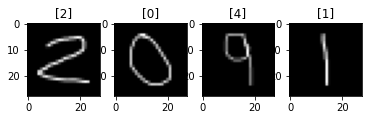

In [6]:
import numpy as np
import cv2
import img2data

img_path='./1029.png'

image = cv2.imread(img_path)
plt.imshow(image)
plt.show()

numbers = img2data.img2digits(image, (28, 28), border=4)
for i, n in enumerate(numbers):
    print(n.shape)
    Z= model.predict(n.astype(np.float32)/255.0)
    
    pred = np.argmax(Z, axis=1)
    print(Z, pred)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred))
    plt.imshow(n.reshape(28,28), cmap='gray')